In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer,execute, IBMQ
from qiskit.quantum_info import Statevector # the state vector of the required qubits is generated
#The variables are initialized to generate the quantum circuit
msg =  QuantumRegister(1) # infomration
Alice = QuantumRegister(1) # emisor
Bob = QuantumRegister(1) #receptor
key1 = ClassicalRegister(1) #condition one
key2 = ClassicalRegister(1) # condition two
output  = ClassicalRegister(1) # classical bit output
circuit = QuantumCircuit(msg,Alice, Bob, key1, key2, output) # genrate the quantum

In [2]:
import numpy as np
zero_state = 0.25 # value in zero state

circuit.initialize([np.sqrt(zero_state), np.sqrt(1-zero_state)], msg) #obtain the value for msg variable
backend = Aer.get_backend('statevector_simulator') # simulate the previous circuit
job = execute(circuit, backend)
result = job.result()
print(result.get_statevector(circuit, decimals=3)) # show the vector output at this moment with 3 decimals

[0.5  +0.j 0.866+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


In [3]:
circuit.barrier() 
circuit.h(Alice) 
circuit.cx(Alice,Bob) # in this par of the circuit generate the bell state from tutorial number 1


circuit.barrier()
circuit.cx(msg, Alice)
circuit.h(msg)

circuit.barrier()
circuit.measure(msg, key1)
circuit.measure(Alice, key2) # at this point in the cycle the measurement of msg and Alice is generated 


circuit.z(Bob).c_if(key1, 1) # this command if the measure in key1 if is one then  in the Bob qubit apply a Z gate
circuit.x(Bob).c_if(key2, 1) # this command if the measure in key2 if is one then
circuit.draw()

┌─────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐          »
q0_0: ┤ Initialize(0.5,0.86603) ├─░────────────░───■──┤ H ├─░─┤M├──────────»
      └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐       »
q1_0: ────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├───────»
                                  ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐ »
q2_0: ────────────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ Z ├─»
                                  ░      └───┘ ░            ░  ║  ║  └─╥─┘ »
                                                               ║  ║ ┌──╨──┐»
c0: 1/═════════════════════════════════════════════════════════╩══╬═╡ = 1 ╞»
                                                               0  ║ └─────┘»
c1: 1/════════════════════════════════════════════════════════════╩════════»
                                                                  0        »
c2: 1/═════════════════════════════════════════════════════════════════════»
                                                                           »
«             
«q0_0: ───────
«             
«q1_0: ───────
«       ┌───┐ 
«q2_0: ─┤ X ├─
«       └─╥─┘ 
«c0: 1/═══╬═══
«      ┌──╨──┐
«c1: 1/╡ = 1 ╞
«      └─────┘
«c2: 1/═══════
«

[ 0.   +0.j  0.5  +0.j  0.   +0.j -0.   +0.j -0.   +0.j  0.866-0.j
 -0.   +0.j -0.   +0.j]


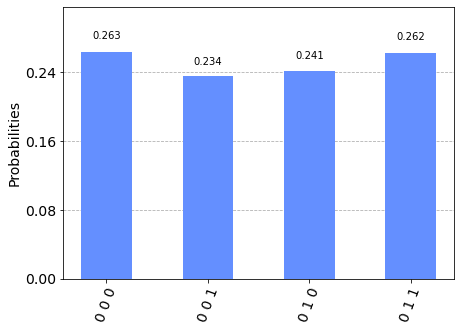

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
counts = result.get_counts()
print(result.get_statevector(circuit, decimals=3))
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
